In [1]:
import os
import sys
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader
from plotter import TensorboardPlotter
from dataset import SingleTaskDataset
from model import SingleTaskMLP
import matplotlib.pyplot as plt

import shap

In [2]:
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device : ", device)

# Load model
model1 = SingleTaskMLP(hidden_unit=128, class_type=1)
model1.to(device)
model1.load_state_dict(torch.load('./model/smote_1.pth', map_location=device))

model2 = SingleTaskMLP(hidden_unit=128, class_type=2)
model2.to(device)
model2.load_state_dict(torch.load('./model/smote_2.pth', map_location=device))
print("Model loaded")

Device :  cpu
Model loaded


In [3]:
test_data1 = SingleTaskDataset(mode='test', class_type=1)
test_data2 = SingleTaskDataset(mode='test', class_type=2)

In [5]:
test_data1_features = test_data1.features
test_data2_features = test_data2.features

# convert into Tensor
test_data1_features = torch.from_numpy(test_data1_features).float()
test_data2_features = torch.from_numpy(test_data2_features).float()


In [6]:
explainer1 = shap.DeepExplainer(model1, test_data1_features)
explainer2 = shap.DeepExplainer(model2, test_data2_features)

shap_values1 = explainer1.shap_values(test_data1_features)
shap_values2 = explainer2.shap_values(test_data2_features)


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.


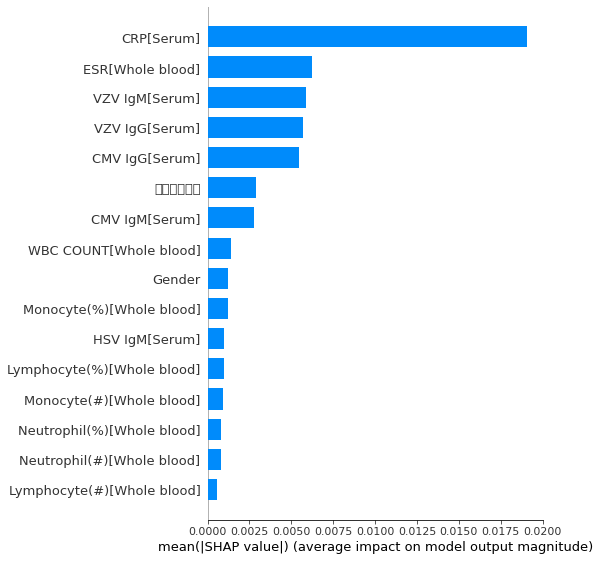

In [7]:
shap.summary_plot(shap_values1, test_data1_features, plot_type="bar", feature_names=test_data1.feature_names)

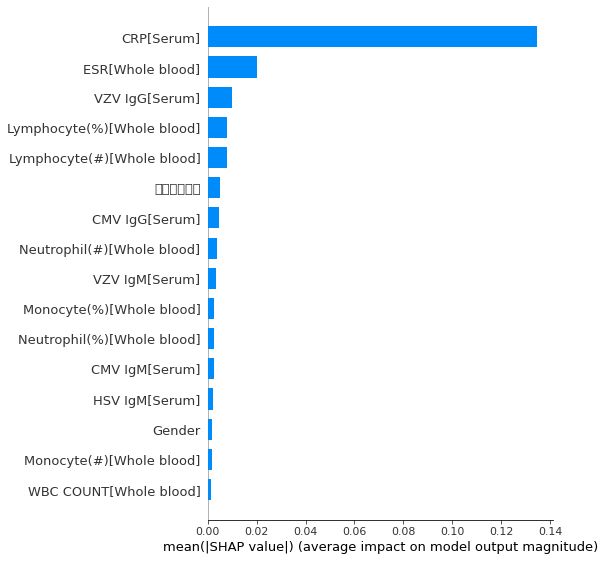

In [8]:
shap.summary_plot(shap_values2, test_data2_features, plot_type="bar", feature_names=test_data2.feature_names)